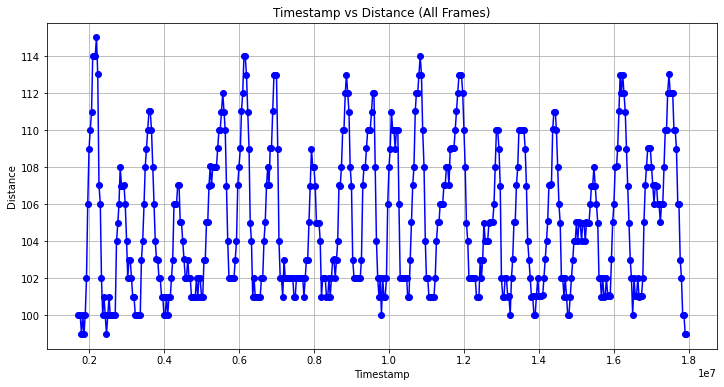

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Updating the file path to match the user's directory structure
time = 'face_landmarks_20241217_160737_028918'
file_path = 'data/20times_4points_gum/participant/patty/' + time + '.csv'
# riceball or gum

# Load the CSV file from the updated directory
df = pd.read_csv(file_path)

first = 6
last = 61

# Filter the data
df = df[df['Timestamp'] < (df['Timestamp'].max() * last // (8 * 8))]
df = df[df['Timestamp'] > (df['Timestamp'].max() * first // (8 * 8))]

# Extract the Frame and Distance columns for plotting
frames = df['Timestamp']
distances = df['Distance']

# Create a plot with Timestamp on the x-axis and Distance on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(frames, distances, marker='o', linestyle='-', color='b')
#plt.axhline(y=107, color='r', linestyle='--', label='Distance = 94')
plt.title('Timestamp vs Distance (All Frames)')
plt.xlabel('Timestamp')
plt.ylabel('Distance')
plt.grid(True)
#plt.legend()

# Display the plot
plt.show()

In [1104]:
import csv
from scipy.stats import zscore

# CSVファイルのパスの指定
csv_filename = file_path

# ピーク検出のパラメータ
Z_THRESHOLD = 0.01    # Zスコアの閾値
MIN_INTERVAL = 0    # ピーク間の最小フレーム間隔

distances = []
timestamps = []
frame_numbers = []

# データ全体の読み込み
all_data = []
with open(csv_filename, 'r', newline='') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        all_data.append({
            'Distance': float(row['Distance']),
            'Timestamp': int(row['Timestamp']),
            'Frame_Count': int(row['Frame_Count'])
        })

# タイムスタンプでのフィルタリング
max_timestamp = max(d['Timestamp'] for d in all_data)
filtered_data = [
    row for row in all_data
    if max_timestamp * first // 64 < row['Timestamp'] < max_timestamp * last // 64
]

# フィルタリングされたデータでの処理の再開
peak_timestamps = []
interval_count = 0
flag = True

for row in filtered_data:
    distance = row['Distance']
    timestamp = row['Timestamp']
    frame_number = row['Frame_Count']

    distances.append(distance)
    timestamps.append(timestamp)
    frame_numbers.append(frame_number)

    # 直近30件のデータでのピーク検出
    recent_distances = distances[-30:]
    z_scores = zscore(recent_distances)
    
    mean_distances = sum(recent_distances) / len(recent_distances)

    if interval_count > 0:
        interval_count -= 1
    elif abs(z_scores[-1]) > Z_THRESHOLD and (mean_distances < recent_distances[0] and not(flag)):
        peak_timestamps.append(timestamp)
        flag = True
    elif abs(z_scores[-1]) > Z_THRESHOLD and (mean_distances > recent_distances[0] and flag):
        interval_count = MIN_INTERVAL
        flag = False

total_peaks = len(peak_timestamps)

print(f'ピークの総数: {total_peaks}')
print('ピークが検出されたタイムスタンプ:')
for ts in peak_timestamps:
    print(ts)

ピークの総数: 24
ピークが検出されたタイムスタンプ:
2929632
3729279
4429032
5229019
6194929
6294968
6927921
7662898
8828767
9693568
10259907
10962845
11592703
12426255
13493565
13758141
14291577
15192551
15892101
16024760
16124244
16357342
16991969
17824020


###### 